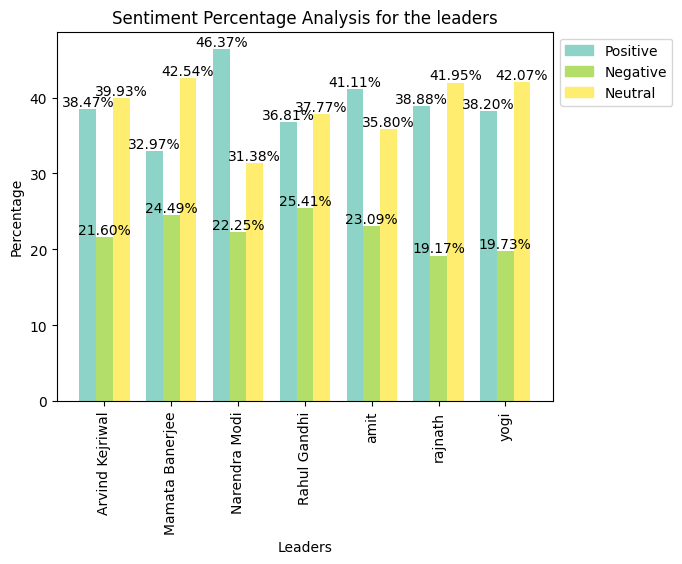

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file into a pandas DataFrame
file_path = ("C:\\Users\\Shubham\\Desktop\\Leader Merge File.csv")
data = pd.read_csv(file_path)

# Group the data by persons and calculate the sentiment percentages
person_sentiment_counts = data.groupby('leader')['score'].value_counts()
person_total_counts = data['leader'].value_counts()

# Calculate the percentages for each sentiment
person_positive_percentages = (person_sentiment_counts[:, 'Positive'] / person_total_counts) * 100
person_negative_percentages = (person_sentiment_counts[:, 'Negative'] / person_total_counts) * 100
person_neutral_percentages = (person_sentiment_counts[:, 'Neutral'] / person_total_counts) * 100

# Create the bar graph
persons = person_positive_percentages.index.tolist()
positive_percentages = person_positive_percentages.values.tolist()
negative_percentages = person_negative_percentages.values.tolist()
neutral_percentages = person_neutral_percentages.values.tolist()

# Generate different colors for each bar
colors = plt.cm.get_cmap('Set3', 3)

fig, ax = plt.subplots()

# Plot the bar graph with different colors for each sentiment
bar_width = 0.25
bar_pos = np.arange(len(persons))

bars_positive = ax.bar(bar_pos, positive_percentages, width=bar_width, color=colors(0))
bars_negative = ax.bar(bar_pos + bar_width, negative_percentages, width=bar_width, color=colors(1))
bars_neutral = ax.bar(bar_pos + 2 * bar_width, neutral_percentages, width=bar_width, color=colors(2))

# Add the percentage values at the end of each line
for rect in bars_positive + bars_negative + bars_neutral:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

ax.set_xlabel('Leaders')
ax.set_ylabel('Percentage')
ax.set_title('Sentiment Percentage Analysis for the leaders')
ax.set_xticks(bar_pos + bar_width)
ax.set_xticklabels(persons, rotation=90)

# Add a legend for the colors
legend_labels = ['Positive', 'Negative', 'Neutral']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=colors(i)) for i in range(len(legend_labels))]
ax.legend(legend_handles, legend_labels, bbox_to_anchor=(1, 1))

plt.show()